In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

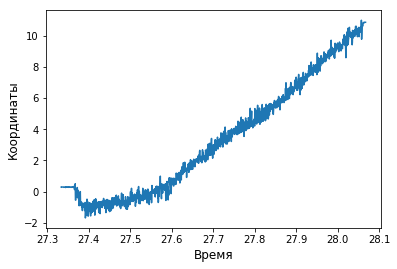

In [37]:
file_name = 'data1.xlsx'
data = pd.ExcelFile(file_name)
#print(type(data))

#print(data.sheet_names)

# 1 способ вытаскивания данных 
# df1 = data.parse('WinPos')
# print(df1)
# 2 способ
with open(file_name, 'r') as f: #чтение, r - read
    data_table = pd.read_excel(file_name, index_col = None, header = None)
#print(type(data_table))

#print(data_table.shape)

#print(data_table.info())

#print(data_table.iloc[:5,:5]) #вывод 5 строк и колонок

time = np.array(data_table[0][:-75]) #убираем последние 75 значений, где скачок
data = np.array(data_table[1][:-75])


fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,data)
plt.show()


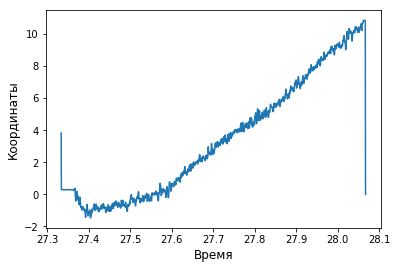

In [3]:
def average_data(arr):
    min_elem = arr[0]
    max_elem = arr[len(arr)-1]
    new_arr = np.zeros(len(arr))
    for x in range(len(arr)-1):
        if x == min_elem:
            new_arr[x] = (arr[x] + arr[x + 1])/2
        elif x == max_elem:
            new_arr[x] = (arr[x] + arr[x - 1])/2
        else:
            new_arr[x] = (arr[x - 1] + arr[x] + arr[x + 1])/3
    return new_arr
new_data = average_data(data)    

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,new_data)
plt.show()

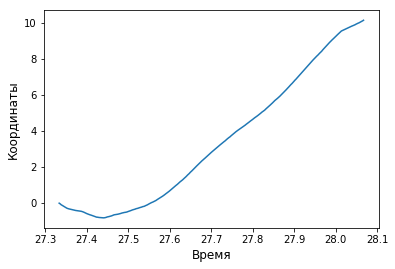

In [4]:
def average_data2(arr, N):
    len_arr = len(arr)
    result = np.zeros(len_arr)
    di = 0 if N % 2 == 0 else 1
    for i in range(len_arr):
        min_i = i - int(N/2)
        max_i = i + int(N/2)
        result[i] = np.average(arr[max(min_i,0): min(max_i + di, len_arr + 1)])
    return result

new_data2 = average_data2(data, 200) 

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Координаты", fontsize = 12)
ax.plot(time,new_data2)
plt.show()
# print(new_data2)

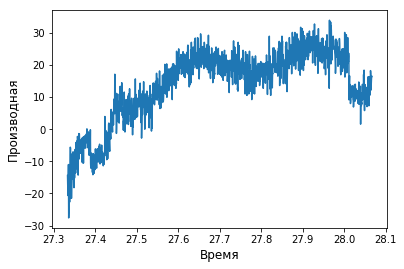

In [5]:
def diff(data_chto, time):
    len_arr = len(data_chto)
    if len(time) != len_arr:
        return None
    array_diff = np.zeros(len_arr)
    for i in range(len_arr-1):
        array_diff[i] = (data_chto[i+1] - data_chto[i])/(time[i+1]-time[i])
    array_diff[len_arr-1] = array_diff[len_arr - 2]
    return array_diff
        
Dif = diff(new_data2,time)


fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Производная", fontsize = 12)
ax.plot(time,Dif)
plt.show()
# diff(new_data2,time)

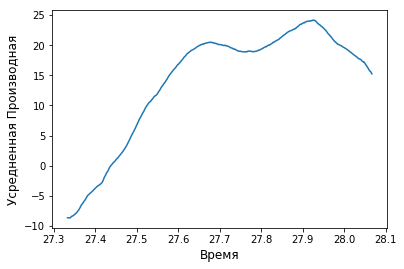

In [6]:
aver_dif = average_data2(Dif,300)

fig, ax = plt.subplots()
ax.set_xlabel("Время", fontsize = 12)
ax.set_ylabel("Усредненная Производная", fontsize = 12)
ax.plot(time,aver_dif)
plt.show()

In [17]:
# поиск коэффциентов в методе наименьших квадратов по формуле, где k - степень будущего полинома (надо подбирать)
def model(x, y, k): 
    M = np.zeros((len(x), k+1))
    A = np.zeros(k)
    for i in range (k+1):
        for j in range (len(x)):
            M[j][i] = x[j] ** (k - i)
    M_T = M.T
    M_1 = np.linalg.inv(np.dot(M_T, M))
    A = np.dot(np.dot(M_1,M_T),y)
    return A


x = np.arange(5)+2
y = np.array(x**2+3)
a = model(x,y,3)

[  7.  12.  19.  28.  39.]


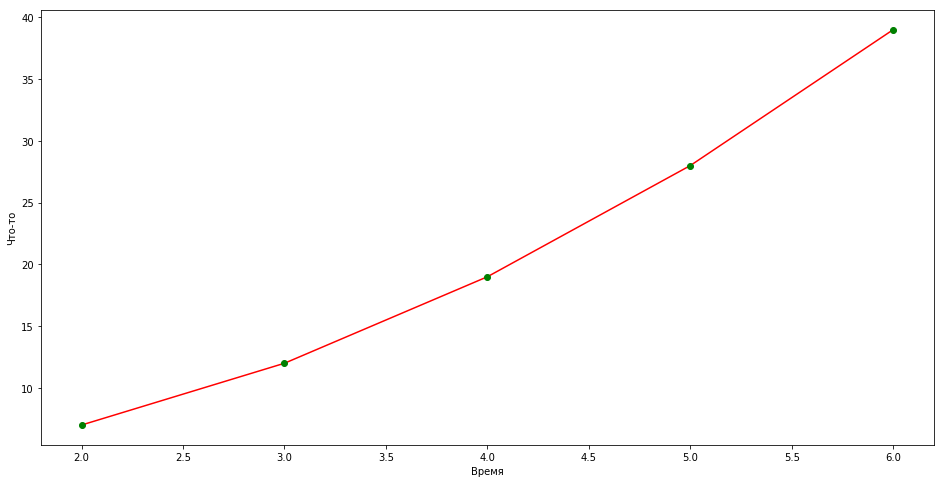

In [18]:
def Polinom_value(a, x):
    p = 0.0
    for i in range(len(a)):
        p *= x
        p += a[i]
    return p

def Polinom_value2(x, y, k):
    a = model(x,y,k)
    p = 0.0
    for i in range(len(a)):
        p *= x
        p += a[i]
    return p

# def Polinom(x, y, k):
#     polinom = np.zeros(len(x))
#     for i in range(k+1):
#         for j in range(len(x)):
#             polinom[j] += model(x,y,k)[k - i]*np.power(x[j], k - i)
#     return polinom

P = Polinom_value2(x,y,3)

#P = Polinom(time,data,2)
# print(P)
# fig, ax = plt.subplots(figsize=(16,8))
# ax.set_xlabel("Время")
# ax.set_ylabel("Что-то")
# ax.plot(x,y, 'r')
# ax.plot(x,P, 'go')
# pl.show()


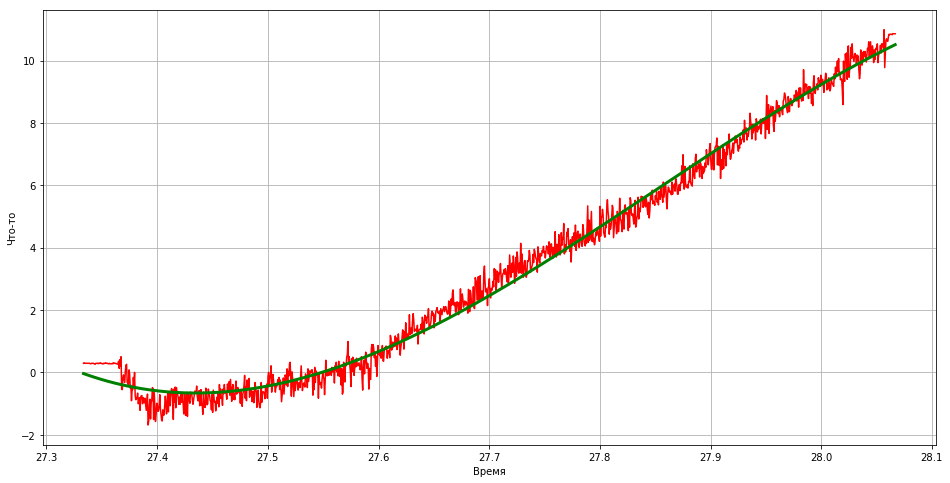

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlabel("Время")
ax.set_ylabel("Что-то")
ax.plot(time,data, 'r')
ax.plot(time,Polinom_value2(time, data, 4), 'g', linewidth = 3)
ax.grid()
pl.show()

In [10]:
# вычисление средне квадратическую ошибку, для нахождение оптимального k (см. выше)
def CKO(x, y):
    error = 0
    polinom = 0
    for i in range(len(y)):
        while()
       
    return polinom
    
        
np.shape(CKO(time,data,3))

()

In [11]:
#?ax.plot